In [3]:
import csv
from preprocess_helpers import myPreprocessed
import numpy as np
import matplotlib.pyplot as pp
from helper import getConcept


In [4]:
X_np, Y_logits, changing_vars, data_cols = myPreprocessed()
input_dim = X_np.shape[2]
changing_dim = len(changing_vars)

In [5]:
dir = "/workdir/optimal-summaries-public/vasopressor/models/mimic-iii/vasopressor/"
dir_top_k = dir + "/top-k/"


In [6]:
num_concepts = 4
rand = 1
# get top features for a set number of concepts
greedy_result = []
with open(dir + 'bottleneck_r{}_c{}_topkinds.csv'.format(rand, num_concepts), mode ='r') as file:
    # reading the CSV file
    csvFile = csv.reader(file)
    header = next(csvFile)
    for row in csvFile:
        greedy_result.append(np.array(row, dtype=float))
greedy_result = np.array(greedy_result)
header

FileNotFoundError: [Errno 2] No such file or directory: '/workdir/optimal-summaries-public/vasopressor/models/mimic-iii/vasopressor/bottleneck_r1_c4_topkinds.csv'

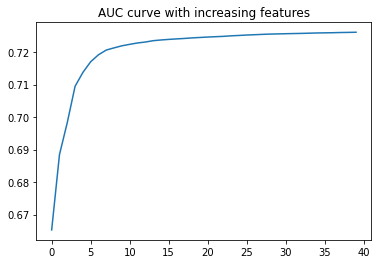

In [4]:
pp.plot(greedy_result[:, 0])
pp.title("AUC curve with increasing features")
pp.show()

In [5]:
greedy_result = greedy_result[greedy_result[:, 1].argsort()]

for i, (auc, concept, ind) in enumerate(greedy_result):
    print(f"Concept {int(concept)}: " + str(getConcept(data_cols, input_dim, changing_dim, int(ind))))


Concept 0: ('creatinine', 'raw')
Concept 0: ('sbp', 'hours below threshold')
Concept 0: ('lactate', 'raw')
Concept 0: ('fio2', 'var of indicators')
Concept 0: ('pco2', 'var of indicators')
Concept 0: ('is_emergency', 'raw')
Concept 0: ('temp', 'mean')
Concept 0: ('bilirubin_total', 'raw')
Concept 0: ('map', 'hours above threshold')
Concept 0: ('po2', 'mean')
Concept 0: ('spo2', '# switches')
Concept 0: ('hr', 'raw')
Concept 0: ('dbp', 'var of indicators')
Concept 1: ('dbp', 'first time measured')
Concept 1: ('spontaneousrr', 'raw')
Concept 1: ('hr', 'raw')
Concept 1: ('is_csru', 'raw')
Concept 1: ('hgb', 'var')
Concept 1: ('pco2', 'mean')
Concept 1: ('temp', 'raw')
Concept 2: ('creatinine', 'raw')
Concept 2: ('spo2', 'var of indicators')
Concept 2: ('inr', 'raw')
Concept 2: ('wbc', 'raw')
Concept 2: ('age', 'raw')
Concept 2: ('ast_ind', 'raw')
Concept 3: ('is_csru', 'raw')
Concept 3: ('inr', 'hours below threshold')
Concept 3: ('glucose', 'slope')
Concept 3: ('ast', 'first time measure